# LAB 3: Pytorch Tutorials

## 1. Tensor

In [2]:
import torch

In [35]:
x = torch.empty(1) # scalar
print(x)

tensor([-1.3663e+12])


In [36]:
x = torch.empty(3) # vector, 1D
print(x)

tensor([-5.3580e+10,  3.0702e-41,  2.0000e+00])


In [37]:
x = torch.empty(2,3) # matrix, 2D
print(x)

tensor([[-1.3664e+12,  3.0702e-41,  1.5975e-43],
        [ 1.3873e-43,  1.4574e-43,  6.4460e-44]])


In [6]:
x = torch.empty(2,2,3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

tensor([[[-1.2382e+12,  3.0702e-41,  5.0447e-44],
         [ 0.0000e+00,         nan,  0.0000e+00]],

        [[ 1.3235e-14,  3.6423e-06,  2.0699e-19],
         [ 3.3738e-12,  7.4086e+28,  6.9397e+22]]])


In [7]:
# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print(x)

tensor([[0.6982, 0.2401, 0.0449],
        [0.7825, 0.6538, 0.3179],
        [0.0474, 0.4740, 0.9886],
        [0.6520, 0.4866, 0.5955],
        [0.6609, 0.6676, 0.8751]])


In [38]:
# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [39]:
# check size
print(x.size())

# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.Size([5, 3])
torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [10]:
# construct from data
x = torch.tensor([5.5, 3])
print(x.size())

# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)

torch.Size([2])


In [40]:
# Operations
y = torch.rand(2, 2)
x = torch.rand(2, 2)

print(x)
print(y)

tensor([[0.3787, 0.5423],
        [0.5771, 0.6372]])
tensor([[0.7343, 0.3826],
        [0.6809, 0.6949]])


In [41]:
# elementwise addition
z = x + y
# torch.add(x,y)
print(z)

tensor([[1.1130, 0.9249],
        [1.2580, 1.3321]])


In [42]:
# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
y.add_(x)
print(y)



# other operations

# substraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y
z = torch.div(x,y)

tensor([[1.1130, 0.9249],
        [1.2580, 1.3321]])


In [45]:
# Slicing (same as numpy arrays)
x = torch.rand(5,3)
print(x)
print(x[ : , 0]) # all rows, column 0
print(x[ 1 , : ]) # row 1, all columns
print(x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print(x[1,0].item())

tensor([[0.1296, 0.7882, 0.2459],
        [0.3076, 0.7481, 0.5264],
        [0.3370, 0.3199, 0.7832],
        [0.7435, 0.0086, 0.1235],
        [0.0207, 0.0704, 0.4487]])
tensor([0.1296, 0.3076, 0.3370, 0.7435, 0.0207])
tensor([0.3076, 0.7481, 0.5264])
tensor(0.7481)
0.30759578943252563


In [47]:
# Numpy
# Converting a Torch Tensor to a NumPy array and vice versa is very easy
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print("b: ", type(b) , "a: ", type(a))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
b:  <class 'numpy.ndarray'> a:  <class 'torch.Tensor'>


In [48]:
print(a)
print(b)
print("-")
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
-
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [49]:
torch.cuda.is_available()

False

In [17]:
# by default all tensors are created on the CPU,
# but you can also move them to the GPU (only if it's available )
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tenors
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()

## 2. Autograd

In [53]:
# Autograd does automatic differentiation on "tensors"
# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True)
y = x + 2

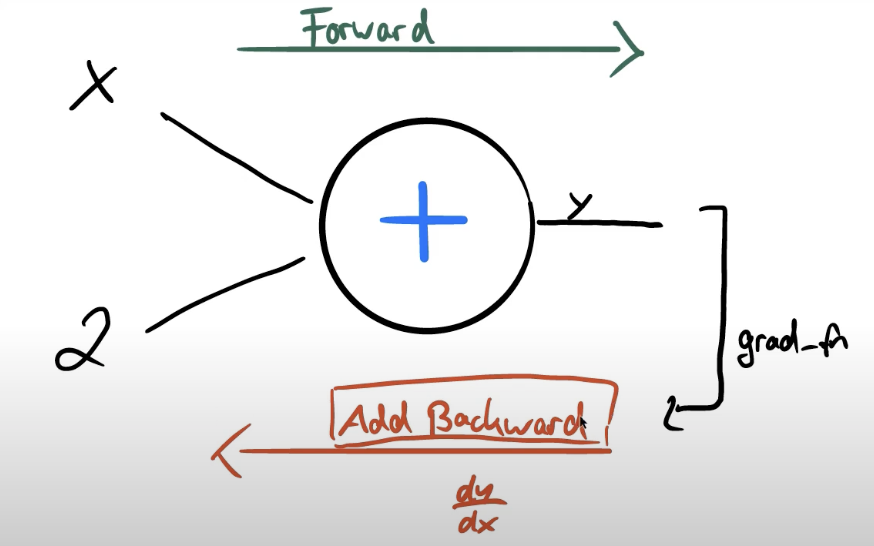

In [54]:
# y was created as a result of an operation, so it has a grad_fn attribute.
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([-0.0021,  0.0610, -0.4215], requires_grad=True)
tensor([1.9979, 2.0610, 1.5785], grad_fn=<AddBackward0>)


In [55]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([11.9753, 12.7429,  7.4748], grad_fn=<MulBackward0>)
tensor(10.7310, grad_fn=<MeanBackward0>)


In [56]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward()
print(x.grad) # dz/dx

tensor([3.9959, 4.1220, 3.1570])


In [57]:
print(y)

tensor([1.9979, 2.0610, 1.5785], grad_fn=<AddBackward0>)


In [59]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

tensor([4.1959, 6.1220, 3.1572])


In [23]:
# -------------
# Stop a tensor from tracking history:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)


a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.requires_grad)
print(b.grad_fn)

False
None
True
True


In [24]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

True
False


In [25]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((a ** 2).requires_grad)


True
False


In [62]:
# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad) # <-

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad
    
    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


## 3. Backpropagation

In [27]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

## 4. Linear Regression with Pytorch

DIY - 1/2 hour


We will start the codewalk again at 3:25ish

In [64]:
# Linear regression
# f = w * x 

# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 200

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 20 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 21: w = 1.934, loss = 0.04506890
epoch 41: w = 1.997, loss = 0.00006770
epoch 61: w = 2.000, loss = 0.00000010
epoch 81: w = 2.000, loss = 0.00000000
epoch 101: w = 2.000, loss = 0.00000000
epoch 121: w = 2.000, loss = 0.00000000
epoch 141: w = 2.000, loss = 0.00000000
epoch 161: w = 2.000, loss = 0.00000000
epoch 181: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### "That's a lot of work"
### Let's code it again the pytorch way!

In [65]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights
#       - dont forget to zero the grad 

import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = 3.597
epoch  1 : w =  1.0443049669265747  loss =  tensor(13.9569, grad_fn=<MseLossBackward>)
epoch  11 : w =  1.8978135585784912  loss =  tensor(0.3665, grad_fn=<MseLossBackward>)
epoch  21 : w =  2.0335772037506104  loss =  tensor(0.0146, grad_fn=<MseLossBackward>)
epoch  31 : w =  2.0539374351501465  loss =  tensor(0.0052, grad_fn=<MseLossBackward>)
epoch  41 : w =  2.055778741836548  loss =  tensor(0.0046, grad_fn=<MseLossBackward>)
epoch  51 : w =  2.0546834468841553  loss =  tensor(0.0044, grad_fn=<MseLossBackward>)
epoch  61 : w =  2.053157091140747  loss =  tensor(0.0041, grad_fn=<MseLossBackward>)
epoch  71 : w =  2.051600933074951  loss =  tensor(0.0039, grad_fn=<MseLossBackward>)
epoch  81 : w =  2.050079107284546  loss =  tensor(0.0036, grad_fn=<MseLossBackward>)
epoch  91 : w =  2.048600196838379  loss =  tensor(0.0034, grad_fn=<MseLossBackward>)
Prediction after training: f(5) = 10.097


## DataLoader (Custom Dataset)

In [30]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):
    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features, labels)

# --------------------------


# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.2170e+01, 1.4500e+00, 2.5300e+00, 1.9000e+01, 1.0400e+02, 1.8900e+00,
         1.7500e+00, 4.5000e-01, 1.0300e+00, 2.9500e+00, 1.4500e+00, 2.2300e+00,
         3.5500e+02],
        [1.2340e+01, 2.4500e+00, 2.4600e+00, 2.1000e+01, 9.8000e+01, 2.5600e+00,
         2.1100e+00, 3.4000e-01, 1.3100e+00, 2.8000e+00, 8.0000e-01, 3.3800e+00,
         4.3800e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00, 1.6800e+01, 1.0000e+02, 2.0200e+00,
         1.4100e+00, 5.3000e-01, 6.2000e-01, 5.7500e+00, 9.8000e-01, 1.5900e+00,
         4.5000e+02],
        [1.2420e+01, 1.6100e+00, 2.1900e+00, 2.2500e+01, 1.0800e+02, 2.0000e+00,
         2.0900e+00, 3.4000e-01, 1.6100e+00, 2.0600e+00, 1.0600e+00, 2.9600e+00,
         3.4500e+02]]) tensor([[2.],
        [2.],
        [2.],
        [2.]])
178 45
Epoch

In [31]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

train_dataset = torchvision.datasets.MNIST(root='/content/', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

torch.Size([3, 1, 28, 28]) torch.Size([3])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Activation Fucntions

In [67]:
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
# -
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


### How would you do that in a complete model architecture?

In [68]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

## CREDITS:
Many examples and notebook suggestions has been taken from Patrick Loeber tutorials.
